In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load and clean data
df = pd.read_csv("/kaggle/input/pict-lab-dataset/IMDB Dataset.csv")
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

texts = df['review'].astype(str).values
labels = df['sentiment'].values

# Split data
x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000)
x_train_tfidf = vectorizer.fit_transform(x_train).toarray()
x_test_tfidf = vectorizer.transform(x_test).toarray()

# Build model
model = Sequential()
model.add(Dense(16, input_shape=(10000,), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train
model.fit(x_train_tfidf, y_train, epochs=5, batch_size=32, validation_data=(x_test_tfidf, y_test))

# Evaluate
loss, acc = model.evaluate(x_test_tfidf, y_test)
print(f"\n✅ Test Accuracy: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8093 - loss: 0.4253 - val_accuracy: 0.9003 - val_loss: 0.2399
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9343 - loss: 0.1768 - val_accuracy: 0.8924 - val_loss: 0.2598
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9479 - loss: 0.1464 - val_accuracy: 0.8866 - val_loss: 0.2948
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9596 - loss: 0.1202 - val_accuracy: 0.8806 - val_loss: 0.3204
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9677 - loss: 0.1025 - val_accuracy: 0.8790 - val_loss: 0.3587
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.3421

✅ Test Accuracy: 0.8790


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


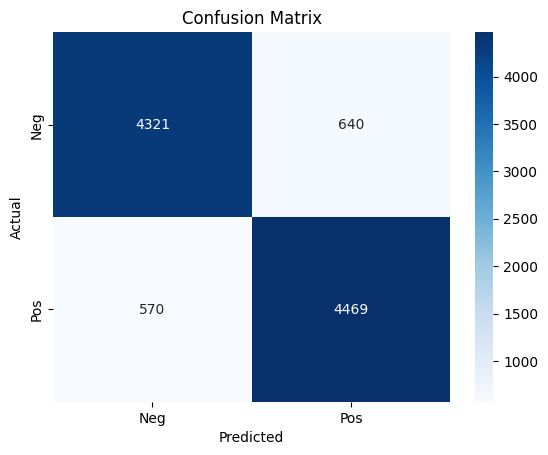

              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88      4961
    Positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [20]:
y_pred = (model.predict(x_test_tfidf) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

In [14]:
# import tensorflow as tf
# from tensorflow.keras.datasets import imdb
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout

# # Step 1: Load the IMDB dataset (only top 10,000 words considered)
# vocab_size = 10000
# max_length = 500  # max number of words per review

# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
# # Step 2: Padding sequences (to make them of equal length)
# x_train = pad_sequences(x_train, maxlen=max_length)
# x_test = pad_sequences(x_test, maxlen=max_length)

# # Step 3: Build the DNN model
# model = Sequential([
#     Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')  # Binary output
# ])
# # Step 4: Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Step 5: Train the model
# history = model.fit(x_train, y_train,
#                     epochs=5,
#                     batch_size=128,
#                     validation_data=(x_test, y_test))

# # Step 6: Evaluate the model
# loss, accuracy = model.evaluate(x_test, y_test)
# print(f"Test Accuracy: {accuracy:.4f}")